In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rtree import index
import face_recognition
import pickle

DATASET_PATH = r"C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled"
coleccion = []
for path in glob.iglob(os.path.join(DATASET_PATH, "**", "*.jpg")):
    print(path)
    person = path.split("\\")[-2]
    print(person)
    coleccion.append({"person":person, "path": path})

coleccion = pd.DataFrame(coleccion)
coleccion.head(10)

C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
Aaron_Eckhart
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Guiel\Aaron_Guiel_0001.jpg
Aaron_Guiel
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Patterson\Aaron_Patterson_0001.jpg
Aaron_Patterson
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
Aaron_Peirsol
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
Aaron_Peirsol
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Peirsol\Aaron_Peirsol_0003.jpg
Aaron_Peirsol
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Peirsol\Aaron_Peirsol_0004.jpg
Aaron_Peirsol
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Pena\Aaron_Pena_0001.jpg
Aaron_Pena
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aaron_Sorkin\Aaron_Sorkin_0001.jpg
Aaron_Sorkin
C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Aar

,person,path
0,Aaron_Eckhart,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
1,Aaron_Guiel,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
2,Aaron_Patterson,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
3,Aaron_Peirsol,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
4,Aaron_Peirsol,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
5,Aaron_Peirsol,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
6,Aaron_Peirsol,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
7,Aaron_Pena,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
8,Aaron_Sorkin,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
9,Aaron_Sorkin,C:\Users\jefersson\Downloads\lfw-funneled\lfw_...


In [2]:
print(coleccion)

              person                                               path
0      Aaron_Eckhart  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
1        Aaron_Guiel  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
2    Aaron_Patterson  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
3      Aaron_Peirsol  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
4      Aaron_Peirsol  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
..               ...                                                ...
422       Aly_Wagner  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
423      Al_Cardenas  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
424         Al_Davis  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
425         Al_Davis  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...
426          Al_Gore  C:\Users\jefersson\Downloads\lfw-funneled\lfw_...

[427 rows x 2 columns]


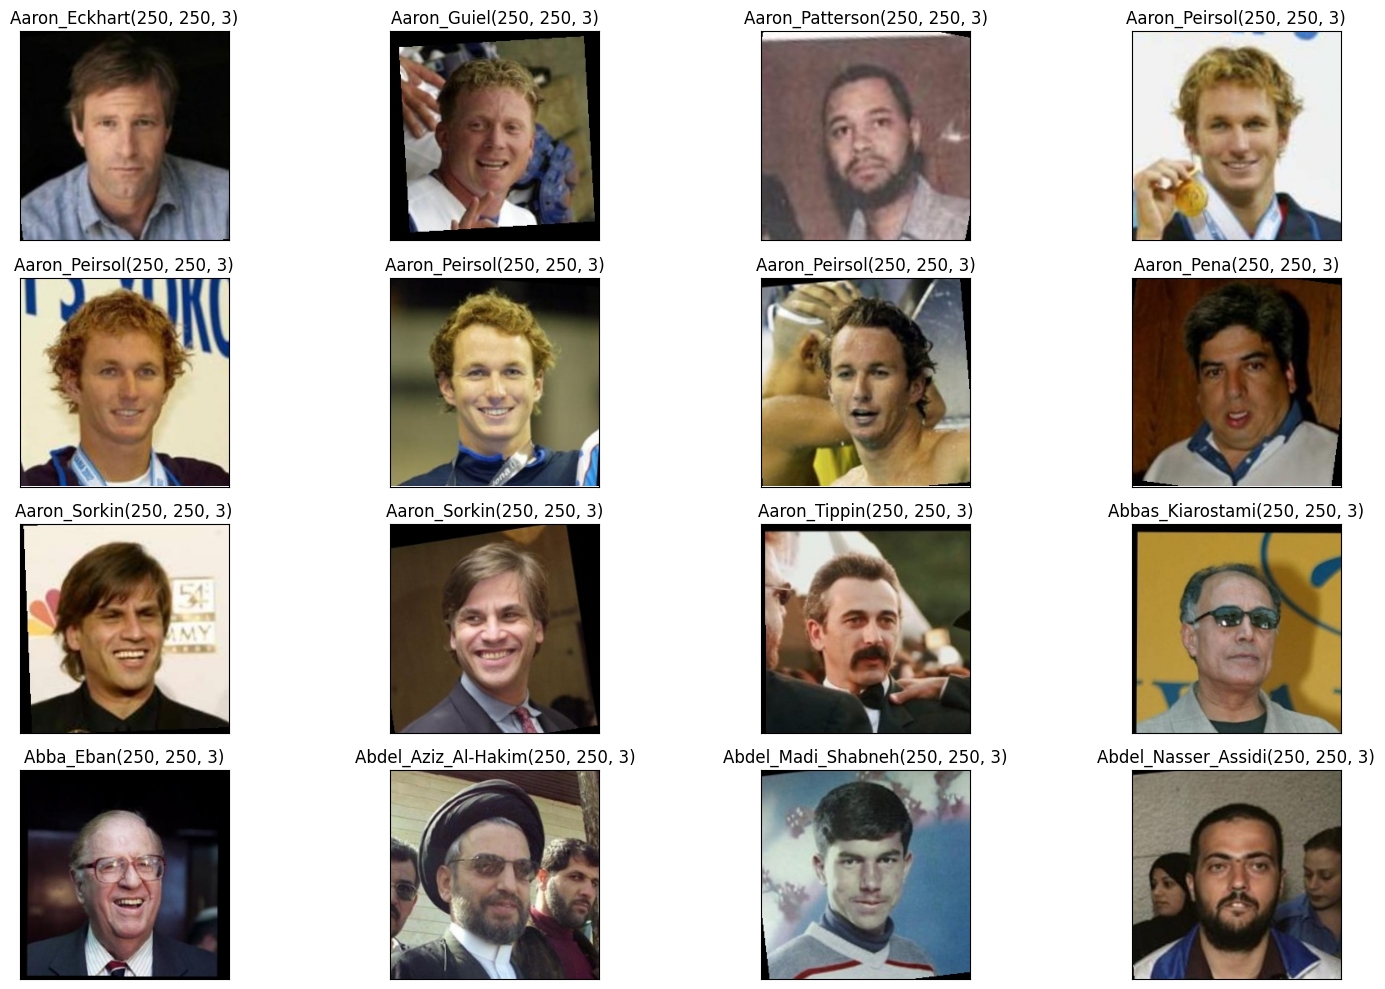

In [3]:
def mostrarFotos(coleccion, indices):
    plt.figure(figsize=(16,10))
    i = 0
    for idx in indices:
        img = plt.imread(coleccion.path.iloc[idx])
        plt.subplot(4, 4, i+1)
        plt.imshow(img)
        plt.title(coleccion.person.iloc[idx]+str(img.shape))
        plt.xticks([])
        plt.yticks([])
        i += 1
    plt.tight_layout()
    plt.show()

#indices = np.random.randint(0, len(coleccion), 5)
indices = list(range(0, 16))
mostrarFotos(coleccion, indices)

In [8]:
# Cargar las imágenes y extraer embeddings faciales
#--p3
def generate_face_embeddings(coleccion, N): 
    embeddings = []
    image_filenames = []    
    for index, row in coleccion.head(N).iterrows():
        filename = row['path']
        if filename.endswith('.jpg') or filename.endswith('.png'): # solo si es jpg o png
            image = face_recognition.load_image_file(filename)   # cargamos las imgenes 
            # Extraer los embeddings faciales
            face_encodings = face_recognition.face_encodings(image) #decode
            if face_encodings:
                # Tomamos el primer rostro detectado en la imagen (si hay varios, solo tomamos uno)
                embeddings.append(face_encodings[0])
                image_filenames.append(row['person'])    
    embeddings = np.array(embeddings)    
    return embeddings, image_filenames

# Cargar embeddings de la colección de fotos
embeddings, image_filenames = generate_face_embeddings(coleccion, N=102)
print(f"Se encontraron {len(embeddings)} rostros en las imágenes.")

Se encontraron 101 rostros en las imágenes.


In [9]:
print(len(embeddings[0]))
print(embeddings[0], image_filenames[0])

128
[-8.30919966e-02  1.73950642e-01  4.69631003e-03 -1.46810189e-01
 -2.32014343e-01  7.76099190e-02 -5.74604273e-02 -5.11788502e-02
  1.91145822e-01 -2.92342193e-02  1.47128746e-01  5.27356975e-02
 -2.20754683e-01 -6.35169223e-02 -7.49110058e-02  1.39257267e-01
 -1.67968899e-01 -7.40360692e-02 -1.17348991e-01 -1.37373120e-01
 -3.69802453e-02  2.87065320e-02  5.30907698e-02 -2.53596399e-02
 -1.09830745e-01 -2.52828270e-01 -5.72239980e-02 -1.16295360e-01
  1.14789665e-01 -1.86593339e-01  1.42044634e-01 -1.25192879e-02
 -1.02765515e-01 -1.20085925e-02  4.28746082e-03  5.49042746e-02
 -1.45769417e-01 -1.84135195e-02  2.21491948e-01 -4.74125780e-02
 -1.79087386e-01  3.72282565e-02  7.14008212e-02  2.70705253e-01
  1.70058712e-01 -5.00584133e-02 -6.43354654e-03 -7.46573508e-02
  1.74978316e-01 -2.26490036e-01  1.25562042e-01  1.46794155e-01
  1.65830135e-01  7.92152062e-02  1.54990643e-01 -1.02882057e-01
  7.10005835e-02  2.19135165e-01 -2.30435953e-01  8.09157789e-02
  1.12515785e-01 -6.0

In [12]:
import psycopg2

def conect():
    
    try:
        conn = psycopg2.connect(
            host="localhost",
            port=5432,
            dbname="lab10",
            user="postgres",
            password="123456"
        )
        cursor = conn.cursor()
        print("Conexión exitosa ")
        return  conn,cursor
    except Exception as e:
        print("Error de conexión:", e)
        
conn,cursor=conect()
#reducimos la dimensión de los embeddings

from sklearn.decomposition import PCA # pip install scikit-learn
pca = PCA(n_components=100)  # Especificamos que queremos reducir a 100 dimensiones
X_reducido = pca.fit_transform(embeddings) 

print(f"Dimensiones originales: {embeddings.shape}")
print(f"Dimensiones reducidas: {X_reducido.shape}")
#insert de embedings and file_name
for embedding, file_name in zip(X_reducido, image_filenames):

    embedding_str = ', '.join(str(x) for x in embedding)

    cursor.execute(
        "INSERT INTO faces (embedding_lineal,embedding_gist, file_name) VALUES (%s, %s,%s)",
        (embedding_str,embedding_str, file_name)
    )

conn.commit()
cursor.close()
conn.close()

Conexión exitosa 
Dimensiones originales: (101, 128)
Dimensiones reducidas: (101, 100)


In [27]:
#P4 ---
from math import sqrt

def euclidiana(vec1,vec2):
    return sqrt(sum((a - b) ** 2 for a, b in zip(vec1, vec2)))

def KNN_lineal(query_image_path, k=3):
    # 1. Cargar imagen de consulta
    query_image = face_recognition.load_image_file(query_image_path)
    query_encoding = face_recognition.face_encodings(query_image)
    
    if not query_encoding:
        print("No se detectó ningún rostro")
        return []

    query_embedding = query_encoding[0]

    # 2. Calcular distancias euclidianas
    distances = []
    for i, embedding in enumerate(embeddings):
        distance = euclidiana(query_embedding, embedding)
        distances.append((image_filenames[i], distance))

    # 3. Ordenar y retornar los k vecinos más cercanos
    knn = sorted(distances, key=lambda x: x[1])[:k]
    return knn
    
#uso
resultados = KNN_lineal(r"C:\Users\jefersson\Downloads\lfw-funneled\lfw_funneled\Alberto_Fujimori\Alberto_Fujimori_0002.jpg", k=3)
for nombre, dist in resultados:
    print(f"{nombre} -> Distancia_euclidiana: {dist:.4f}")

Adisai_Bodharamik -> Distancia: 0.5657
Adolfo_Aguilar_Zinser -> Distancia: 0.7084
Adolfo_Aguilar_Zinser -> Distancia: 0.7086
